**Import The Packages**

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


**Part 1: Data Analysis and Preprocessing**

Importing Dataset

In [115]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ecommerce_data.csv')
df.head()

,CustomerID,Timestamp,ProductID,Category,Price,Quantity,Action
0,1052,2023-01-01,2,Clothing,125.570224,2,Add to Cart
1,1093,2023-01-02,15,Clothing,191.996781,3,Add to Cart
2,1015,2023-01-03,8,Clothing,40.645691,1,Add to Cart
3,1072,2023-01-04,8,NaN,NaN,2,View
4,1061,2023-01-05,17,NaN,NaN,5,Purchase


Dataset information

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  1000 non-null   int64  
 1   Timestamp   1000 non-null   object 
 2   ProductID   1000 non-null   int64  
 3   Category    900 non-null    object 
 4   Price       900 non-null    float64
 5   Quantity    1000 non-null   int64  
 6   Action      1000 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


Handle missing values

In [117]:
# Check for missing values
df.isnull().sum()


,0
CustomerID,0
Timestamp,0
ProductID,0
Category,100
Price,100
Quantity,0
Action,0


In [118]:

# Fill missing values in numerical columns
df['Price'] = df['Price'].fillna(df['Price'].median())

# Fill missing values in categorical columns
df['Category'] = df['Category'].fillna('N/A')


In [84]:
# Check for any remaining missing values
missing_values = df.isnull().sum()
print(missing_values)


CustomerID    0
Timestamp     0
ProductID     0
Category      0
Price         0
Quantity      0
Action        0
dtype: int64


Analyze Customer Interactions

In [119]:
# Count the total actions per customer
customer_actions = df.groupby('CustomerID').size().reset_index(name='TotalActions')

customer_actions.head()

,CustomerID,TotalActions
0,1001,16
1,1002,13
2,1003,12
3,1004,11
4,1005,11


**Part 2: Feature Engineering and Analysis**

Total amount spent by each customer

In [120]:
# Create TotalSpent by multiplying Price with Quantity
df['TotalSpent'] = df['Price'] * df['Quantity']

total_spent_per_customer = df.groupby('CustomerID')['TotalSpent'].sum().reset_index()
total_spent_per_customer.head()


,CustomerID,TotalSpent
0,1001,6878.924205
1,1002,10987.303028
2,1003,9786.470932
3,1004,7994.208109
4,1005,7451.954286


Group the data by Category and analyze the most popular categories

In [121]:

category_popularity = df['Category'].value_counts().reset_index()
category_popularity.columns = ['Category', 'Count']
category_popularity.head()


,Category,Count
0,Clothing,239
1,Electronics,234
2,Books,225
3,Home,202
4,N/A,100


Calculate Average Price per Category

In [122]:
# Calculate the average price per category
average_price_per_category = df.groupby('Category')['Price'].mean().reset_index()
average_price_per_category.head()


,Category,Price
0,Books,263.292355
1,Clothing,246.535105
2,Electronics,261.835832
3,Home,259.914688
4,N/A,266.021046


**Part 3: Machine Learning Preprocessing**

Convert categorical variables into numerical representations using one-hot encoding.

In [123]:
df = pd.get_dummies(df, columns=['Category', 'Action'])

Standardize numerical features using Z-score normalization

In [124]:
scaler = StandardScaler()
df[['Price', 'Quantity', 'TotalSpent']] = scaler.fit_transform(df[['Price', 'Quantity', 'TotalSpent']])

Split the dataset into training and testing sets (80% training, 20% testing)

In [125]:

X = df.drop(columns=['CustomerID', 'Timestamp', 'TotalSpent'])
y = df['TotalSpent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (800, 11)
X_test: (200, 11)
y_train: (800,)
y_test: (200,)


**Part 4: Insights and Data Preparation Summary**


```
Data Analysis: Loaded data, handled missing values strategically, and analyzed customer interactions.
Feature Engineering: Created TotalSpent for each customer and analyzed product categories.
Machine Learning Preprocessing: One-hot encoded categorical variables, standardized numerical features, and split data for training and testing.
```

 Trends and Patterns Observed in the Data

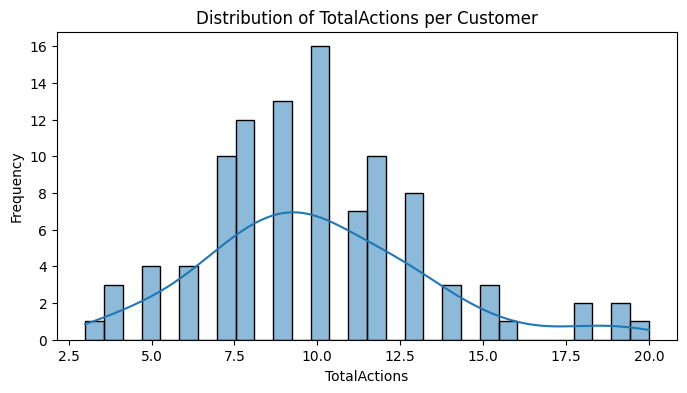

In [145]:

# Plot showing distribution of TotalActions per customer
plt.figure(figsize=(8, 4))
sns.histplot(customer_actions['TotalActions'], bins=30, kde=True)
plt.title("Distribution of TotalActions per Customer")
plt.xlabel("TotalActions")
plt.ylabel("Frequency")
plt.show()


<Figure size 800x400 with 0 Axes>

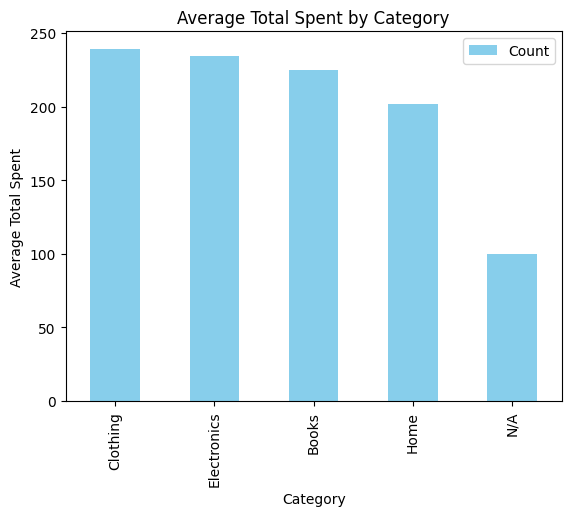

In [165]:
# Bar plot of average TotalSpent by Category
plt.figure(figsize=(8, 4))
category_popularity.plot(kind='bar',x='Category', color='skyblue')
plt.title("Average Total Spent by Category")
plt.xlabel("Category")
plt.ylabel("Average Total Spent")
plt.show()


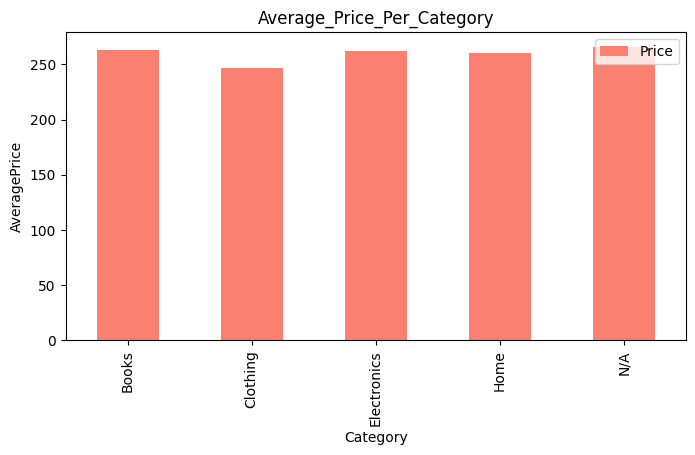

In [153]:
# Plotting the average price by category
average_price_per_category.plot(kind='bar', x='Category', y='Price', color='salmon', figsize=(8, 4))
plt.title("Average_Price_Per_Category")
plt.xlabel("Category")
plt.ylabel("AveragePrice")
plt.show()
